Student Information

Name:  劉榮萱 

Student ID: 106003852

GitHub ID: ll890

Kaggle name: Linda Liou

Kaggle private scoreboard snapshot:

In [1]:
import pandas as pd

# training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine training data
train_df = pd.concat([anger_train, sadness_train, fear_train, joy_train], ignore_index=True) 

In [2]:
# testing data

anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine testing data
test_df = pd.concat([anger_test, sadness_test, fear_test, joy_test], ignore_index=True) 

In [3]:
test_df.head()

,id,text,emotion,intensity
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479
1,10858,@ArcticFantasy I would have almost took offens...,anger,0.458
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500
4,10861,Sometimes I get mad over something so minuscul...,anger,0.708


Exercise 1

In [4]:
# tokenize

import helpers.data_mining_helpers as dmh
import nltk

train_df['unigrams'] = train_df['text'].apply(lambda x: dmh.tokenize_text(x))
test_df['unigrams'] = test_df['text'].apply(lambda x: dmh.tokenize_text(x))

In [5]:
test_df[0:3]['unigrams']

0    [@, ZubairSabirPTI, pls, dont, insult, the, wo...
1    [@, ArcticFantasy, I, would, have, almost, too...
2    [@, IllinoisLoyalty, that, Rutgers, game, was,...
Name: unigrams, dtype: object

In [6]:
# transform into term-document matrix

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_df.text)
test_counts = count_vect.fit_transform(test_df.text)

In [7]:
train_counts.shape

(3613, 10115)

In [8]:
count_vect.get_feature_names()[0:100]

['10',
 '11',
 '11am',
 '12',
 '12s',
 '138',
 '158',
 '15gets20',
 '16',
 '17',
 '18',
 '18mths',
 '1johndes',
 '1st',
 '22',
 '24',
 '25',
 '250',
 '2day',
 '2k',
 '2nd',
 '30',
 '340',
 '3pm',
 '400',
 '50',
 '500',
 '5livesport',
 '7lw',
 '892',
 '__netflixnchill',
 'a3',
 'a79l',
 'aaahhhh',
 'aaliyahlove69',
 'abomination',
 'about',
 'abra',
 'absolutely',
 'academics',
 'accept',
 'accidentally',
 'account',
 'accuse',
 'acrid',
 'across',
 'act',
 'action',
 'actually',
 'adapts',
 'adopting',
 'adorable',
 'ads',
 'adventuretweets',
 'adviser',
 'af',
 'affection',
 'affliction',
 'affront',
 'afghanistan',
 'afraid',
 'after',
 'again',
 'against',
 'age',
 'agenda',
 'aggravate',
 'aggravation',
 'ago',
 'agreed',
 'ahmad_khan_rahami',
 'air',
 'airtel',
 'airtelindia',
 'aishwaryaraibachchan',
 'aka',
 'alan',
 'alarm',
 'alaskagurus',
 'alcohol',
 'alex',
 'alike',
 'all',
 'all4',
 'alliance',
 'almost',
 'alone',
 'already',
 'also',
 'alton',
 'always',
 'am',
 'amateu

In [9]:
# calculate term frequency in train dataset
import numpy as np

term_frequencies = []
for i in range(0,train_counts.shape[1]):
    term_frequencies.append(sum(train_counts[:,i].toarray()))

In [10]:
term_frequencies_train = np.asarray(train_counts.sum(axis=0))[0]

In [11]:
term_frequencies_train[0:3]

array([2, 1, 1], dtype=int64)

In [12]:
# most frequent 30 terms in train dataset
import numpy as np
from collections import Counter

c_train = Counter(term_frequencies_train)
c_train.most_common(30)

[(1, 5478),
 (2, 2217),
 (3, 663),
 (4, 372),
 (5, 220),
 (6, 161),
 (7, 113),
 (8, 97),
 (10, 65),
 (9, 63),
 (11, 50),
 (13, 43),
 (14, 38),
 (12, 36),
 (15, 32),
 (18, 30),
 (16, 29),
 (17, 27),
 (21, 23),
 (20, 17),
 (19, 17),
 (34, 15),
 (24, 14),
 (32, 12),
 (23, 11),
 (27, 9),
 (25, 9),
 (30, 9),
 (28, 8),
 (36, 8)]

In [13]:
# calculate term frequency in test dataset
import numpy as np

term_frequencies = []
for i in range(0,test_counts.shape[1]):
    term_frequencies.append(sum(test_counts[:,i].toarray()))

In [14]:
term_frequencies_test = np.asarray(test_counts.sum(axis=0))[0]

In [15]:
# most frequent 30 terms in test dataset
import numpy as np
from collections import Counter

c_test = Counter(term_frequencies_test)
c_test.most_common(30)

[(1, 1150),
 (2, 441),
 (3, 124),
 (4, 66),
 (6, 32),
 (5, 26),
 (9, 15),
 (7, 13),
 (8, 10),
 (14, 7),
 (11, 6),
 (10, 5),
 (24, 5),
 (20, 4),
 (12, 4),
 (15, 4),
 (30, 3),
 (29, 3),
 (13, 3),
 (17, 3),
 (16, 2),
 (26, 2),
 (22, 2),
 (21, 2),
 (83, 2),
 (34, 2),
 (92, 1),
 (40, 1),
 (32, 1),
 (57, 1)]

In [17]:
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

Exercise 2

In [26]:
# TFIDF

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
text_tf = tf.fit_transform(train_df['text'])

In [23]:
text_tf

<3613x10115 sparse matrix of type '<class 'numpy.float64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [24]:
text_tf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
# show the feature names[100:110]

feature_names = tf.get_feature_names()
feature_names[100:110]

['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

Exercise 3

In [ ]:
# from the confusion matrix, we can tell the accuracy of the predictions.
# accuracy = (55+70+54+42)/all = 0.637

# generally speaking, "anger" and "fear" are easily confused. "sadness" and "fear" are easily confused too. 
# among four different feeling, positive feeling- "joy" is easily distinguished from others.

# let's calculate the precisions of emotions as below.
## precision (anger) = 0.655
## precision (fear) = 0.619
## precision (joy) = 0.667
## precision (sadness) = 0.609
# so the prediction performs best in judging "joy", and worst in judging "sadness".

 Exercise 4

In [18]:
from sklearn.model_selection import train_test_split

# training data: test data= 9:1
X_train, X_test, y_train, y_test = train_test_split(train_counts,train_df['emotion'], test_size=0.1, random_state=1)

In [19]:
# Naive Bayes model and result

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
clf = MultinomialNB().fit(X_train,y_train)
predicted = clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.8232044198895028


Exercise 5

In [20]:
# Decision Tree is easy to construct, easy to interpret for small-sized trees.
# Decision Tree is easy to use features to identify significant dimensions, handle missing values, and deal with outliers.
# for categorical data, Decision Tree is a good approach to deal with it.
# as for its major problem- overfitting, it can be minimized by using boosting approaches or random forest.

# Naive Bayes is a linear classifier, usually get good results in most cases.
# in general, Naive Bayes is highly accurate when applied to big data. In computer vision and robotics, Naive Bayes outperforms.
# Naive Bayes requires to build a classification by hand. Usually we need to combine statistical techniques to guide suitable features.

# In this case, Naive Bayes model performs better result rather Decision Tree.

Exercise 6

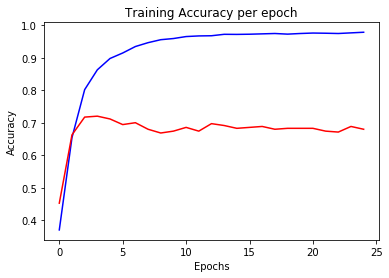

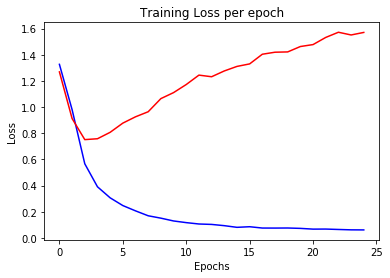

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

#df = pd.read_csv("logs/training_log.csv")
#epoch = df["col_name"]['epoch']
#train_accuracy = df["col_name"]['accuracy']
#val_accuracy = df["col_name"]['val_accuracy']

epoch = pd.read_csv('logs/training_log.csv', usecols = ['epoch'])
train_accuracy = pd.read_csv('logs/training_log.csv', usecols = ['accuracy'])
val_accuracy = pd.read_csv('logs/training_log.csv', usecols = ['val_accuracy'])
train_loss = pd.read_csv('logs/training_log.csv', usecols = ['loss'])
val_loss = pd.read_csv('logs/training_log.csv', usecols = ['val_loss'])
                             
plt.plot(epoch, train_accuracy, color='blue')
plt.plot(epoch, val_accuracy, color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy per epoch')
plt.show()

plt.plot(epoch, train_loss, color='blue')
plt.plot(epoch, val_loss, color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss per epoch')
plt.show()